## scale_ Î∂àÎüâ ÏòàÏ∏°_ NN(Î∂ÑÎ•ò)

In [16]:
# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±:Series, DataFrame
import pandas as pd
import numpy as np
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import matplotlib

# Îç∞Ïù¥ÌÑ∞ scaling
from sklearn.preprocessing import StandardScaler
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:train, test
from sklearn.model_selection import train_test_split
# Î∂ÑÎ•ò NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# ÏµúÏ†Å Î™®Îç∏, ÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
from sklearn.model_selection import GridSearchCV

# Î∂ÑÎ•òÎ™®Îç∏ ÌèâÍ∞Ä Ìï®Ïàò
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Í≤ΩÍ≥† Î©îÏÑ∏ÏßÄ Ï≤òÎ¶¨
import warnings
warnings.filterwarnings(action='ignore') # Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú/Ïà®ÍπÄ
# warnings.filterwarnings(action='default') # Í≤ΩÍ≥† Î©îÏãúÏßÄ ÌôúÏÑ±Ìôî|

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ


## (1)Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±ÌïòÍ∏∞

In [18]:
df_train_x = pd.read_csv("./data/scale_train_x.xls", usecols=lambda column: column != "Unnamed: 0")
df_train_y = pd.read_csv("./data/scale_train_y.xls", usecols=lambda column: column != "Unnamed: 0")
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   pt_width                   695 non-null    int64
 1   fur_soak_time              695 non-null    int64
 2   rolling_temp               695 non-null    int64
 3   day                        695 non-null    int64
 4   hour                       695 non-null    int64
 5   minute                     695 non-null    int64
 6   weekday_number             695 non-null    int64
 7   pt_length_cluster          695 non-null    int64
 8   steel_kind_T               695 non-null    int64
 9   rolling_method_TMCP(Ïò®ÎèÑÏ†úÏñ¥)  695 non-null    int64
 10  work_group_2Ï°∞              695 non-null    int64
 11  work_group_3Ï°∞              695 non-null    int64
 12  work_group_4Ï°∞              695 non-null    int64
 13  is_high_strength_True      695 non-null    int64
 14  is_ship_stee

In [19]:
df_test_x = pd.read_csv("./data/scale_test_x.xls", usecols=lambda column: column != "Unnamed: 0")
df_test_y = pd.read_csv("./data/scale_test_y.xls", usecols=lambda column: column != "Unnamed: 0")
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   pt_width                   299 non-null    int64
 1   fur_soak_time              299 non-null    int64
 2   rolling_temp               299 non-null    int64
 3   day                        299 non-null    int64
 4   hour                       299 non-null    int64
 5   minute                     299 non-null    int64
 6   weekday_number             299 non-null    int64
 7   pt_length_cluster          299 non-null    int64
 8   steel_kind_T               299 non-null    int64
 9   rolling_method_TMCP(Ïò®ÎèÑÏ†úÏñ¥)  299 non-null    int64
 10  work_group_2Ï°∞              299 non-null    int64
 11  work_group_3Ï°∞              299 non-null    int64
 12  work_group_4Ï°∞              299 non-null    int64
 13  is_high_strength_True      299 non-null    int64
 14  is_ship_stee

### rolling_temp drop

In [20]:
df_train_x = df_train_x.drop('rolling_temp', axis = 1)
df_test_x = df_test_x.drop('rolling_temp', axis = 1)

In [21]:
# Data Íµ¨Ï°∞ ÌôïÏù∏
print("train data Íµ¨Ï°∞:", df_train_x.shape)
print()
print("Î≥ÄÏàò : ", df_train_x.columns)

train data Íµ¨Ï°∞: (695, 20)

Î≥ÄÏàò :  Index(['pt_width', 'fur_soak_time', 'day', 'hour', 'minute', 'weekday_number',
       'pt_length_cluster', 'steel_kind_T', 'rolling_method_TMCP(Ïò®ÎèÑÏ†úÏñ¥)',
       'work_group_2Ï°∞', 'work_group_3Ï°∞', 'work_group_4Ï°∞',
       'is_high_strength_True', 'is_ship_steel_True', 'heat_temp_high_True',
       'soak_temp_high_True', 'both_temp_high_True', 'descaling_parity_odd',
       'rolling_temp_1000_low', 'hsb_Ï†ÅÏö©'],
      dtype='object')


In [22]:
# Data Íµ¨Ï°∞ ÌôïÏù∏
print("test data Íµ¨Ï°∞:", df_test_x.shape)
print()
print("Î≥ÄÏàò : ", df_train_x.columns)

test data Íµ¨Ï°∞: (299, 20)

Î≥ÄÏàò :  Index(['pt_width', 'fur_soak_time', 'day', 'hour', 'minute', 'weekday_number',
       'pt_length_cluster', 'steel_kind_T', 'rolling_method_TMCP(Ïò®ÎèÑÏ†úÏñ¥)',
       'work_group_2Ï°∞', 'work_group_3Ï°∞', 'work_group_4Ï°∞',
       'is_high_strength_True', 'is_ship_steel_True', 'heat_temp_high_True',
       'soak_temp_high_True', 'both_temp_high_True', 'descaling_parity_odd',
       'rolling_temp_1000_low', 'hsb_Ï†ÅÏö©'],
      dtype='object')


In [23]:
# # Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏÑ†ÌÉù : select_dtypes="object" Ï†úÏô∏
# df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# # df_raw_x_num.head()

# # Î≥ÄÏàòÎ™Ö Ï†ÄÏû•
# v_feature_names = df_raw_x_num.columns

# # StandardScaler Ï†ÅÏö©
# scaler = StandardScaler()
# df_x_scaled = scaler.fit_transform(df_raw_x_num)
# df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

# display("Scale Î≥ÄÌôò Ï†Ñ:", df_raw_x_num.head())
# display("Scale Î≥ÄÌôò ÌõÑ:",df_x_scaled.head())

In [24]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎßå Ïä§ÏºÄÏùºÎßÅ
num_cols_train = df_train_x.select_dtypes(exclude="object").columns
num_cols_test = df_test_x.select_dtypes(exclude="object").columns

# ÎçîÎØ∏ÌôîÌïú Î≥ÄÏàò Ï§ë 0/1Ïù∏ Ïª¨Îüº Í±∏Îü¨ÎÇ¥Í∏∞
num_cols_train = [col for col in num_cols_train if df_train_x[col].nunique() > 2]
num_cols_test = [col for col in num_cols_test if df_test_x[col].nunique() > 2]

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎßå Îî∞Î°ú Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
scaled_num_train = pd.DataFrame(scaler.fit_transform(df_train_x[num_cols_train]), columns=num_cols_train)
scaled_num_test = pd.DataFrame(scaler.fit_transform(df_test_x[num_cols_test]), columns=num_cols_test)


# Ïä§ÏºÄÏùºÎßÅ Ïïà Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨ÎüºÎì§ Í∞ÄÏ†∏Ïò§Í∏∞ (Ïòà: ÎçîÎØ∏ Î≥ÄÏàò)
df_others_train = df_train_x.drop(columns=num_cols_train)
df_others_test = df_test_x.drop(columns=num_cols_test)


# Ìï©ÏπòÍ∏∞
train_x_scaled = pd.concat([scaled_num_train, df_others_train.reset_index(drop=True)], axis=1)
test_x_scaled = pd.concat([scaled_num_test, df_others_test.reset_index(drop=True)], axis=1)

display("Scale Î≥ÄÌôò_train:", train_x_scaled.head())
display("Scale Î≥ÄÌôò_test:", test_x_scaled.head())


'Scale Î≥ÄÌôò_train:'

pt_width  fur_soak_time       day      hour    minute  weekday_number  \
0 -0.053741       0.460068 -1.120807  0.246352  0.983705       -0.502787   
1 -0.261243      -0.719462 -0.630586 -0.041162 -1.492310       -0.003591   
2  0.568764      -0.530738 -0.140365  0.677623  0.806846        0.495604   
3  0.153760      -0.672281  1.820518 -1.622488  0.924752       -1.001983   
4  0.568764       0.743155 -0.140365  1.396407  1.337421        0.495604   

   pt_length_cluster  steel_kind_T  rolling_method_TMCP(Ïò®ÎèÑÏ†úÏñ¥)  work_group_2Ï°∞  \
0            0.07978             0                          0              0   
1            0.07978             0                          0              0   
2            0.07978             0                          0              0   
3            0.07978             0                          0              0   
4            1.46596             1                          1              1   

   work_group_3Ï°∞  work_group_4Ï°∞  is_high_strength_True  is_ship_steel_True  \
0              0              0                      0                   1   
1              0              0                      0                   0   
2              0              0                      0                   0   
3              0              1                      0                   1   
4              0              0                      1                   1   

   heat_temp_high_True  soak_temp_high_True  both_temp_high_True  \
0                    1                    1                    1   
1                    0                    0                    0   
2                    1                    1                    1   
3                    1                    1                    1   
4                    1                    0                    0   

   descaling_parity_odd  rolling_temp_1000_low  hsb_Ï†ÅÏö©  
0                     0                      0       1  
1                     0                      1       1  
2                     1                      1       1  
3                     0                      1       0  
4                     0                      1       1

'Scale Î≥ÄÌôò_test:'

pt_width  fur_soak_time       day      hour    minute  weekday_number  \
0  0.867813      -0.913459 -0.145202  0.297642  0.819188        0.495611   
1 -0.684774      -0.549709 -1.120827  0.297642 -0.030502       -0.505658   
2 -0.684774       2.983863  0.342611 -1.128559 -1.446650        0.996246   
3  1.061887      -0.133995 -0.633014  0.868122 -1.559942       -0.005023   
4  0.091520      -0.549709 -0.145202  0.440262  0.082790        0.495611   

   pt_length_cluster  steel_kind_T  rolling_method_TMCP(Ïò®ÎèÑÏ†úÏñ¥)  work_group_2Ï°∞  \
0           0.130886             0                          0              0   
1           1.480364             0                          0              0   
2          -1.218592             1                          0              1   
3          -1.218592             0                          0              0   
4           0.130886             0                          0              0   

   work_group_3Ï°∞  work_group_4Ï°∞  is_high_strength_True  is_ship_steel_True  \
0              0              0                      0                   1   
1              0              0                      0                   0   
2              0              0                      0                   0   
3              0              0                      0                   1   
4              0              0                      1                   0   

   heat_temp_high_True  soak_temp_high_True  both_temp_high_True  \
0                    1                    1                    1   
1                    1                    1                    1   
2                    1                    0                    0   
3                    0                    0                    0   
4                    1                    1                    1   

   descaling_parity_odd  rolling_temp_1000_low  hsb_Ï†ÅÏö©  
0                     0                      1       1  
1                     0                      0       1  
2                     0                      1       1  
3                     0                      1       1  
4                     0                      1       1

## (2)Î™®Îç∏ ÏÉùÏÑ±

### Í∏∞Î≥∏ ÏòµÏÖò Î™®Îç∏ ÏÉùÏÑ±

In [25]:
nn_uncust = MLPClassifier(random_state=1234)
nn_uncust.fit(df_train_x, df_train_y)

# train Î™®Îç∏ Ï†ïÌôïÎèÑ
print("Train Accuracy: {:.3f}".format(nn_uncust.score(train_x_scaled, df_train_y)))
# test Î™®Îç∏ Ï†ïÌôïÎèÑ
print("Test Accuracy: {:.3f}".format(nn_uncust.score(test_x_scaled, df_test_y)))

Train Accuracy: 0.599
Test Accuracy: 0.612


In [26]:
# Ïã§ÌñâÏòµÏÖò ÌôïÏù∏
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [27]:
# ÏùÄÎãâÏ∏µ 2Í∞ú, Í∞Å ÏùÄÎãâÏ∏µ ÎÖ∏Îìú 100Í∞ú
nn_uncust2 = MLPClassifier(hidden_layer_sizes=(100,200), random_state=1234) 
nn_uncust2.fit(df_train_x, df_train_y)

# train Î™®Îç∏ Ï†ïÌôïÎèÑ
print("Accuracy on training set: {:.3f}".format(nn_uncust2.score(df_train_x, df_train_y)))
# test Î™®Îç∏ Ï†ïÌôïÎèÑ
print("Accuracy on test set: {:.3f}".format(nn_uncust2.score(df_test_x, df_test_y)))

Accuracy on training set: 0.312
Accuracy on test set: 0.311


## Grid Search

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_st

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001,

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stoppin

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activati

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_sto

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, ear

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] E

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_st

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alph

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END act

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=T

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activatio

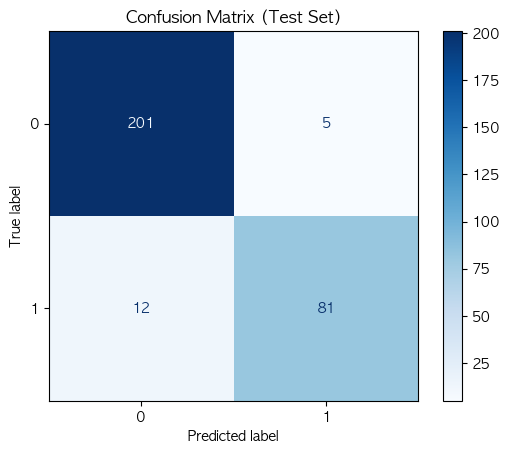

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ï†ïÎ∞ÄÌïú ÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Î≤îÏúÑ
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (128, 64), (64, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.005, 0.01],
    'solver': ['adam'],
    'max_iter': [300],
    'early_stopping': [True]  # ÌïµÏã¨ ÏòµÏÖò
}

# Í∏∞Î≥∏ Î™®Îç∏ ÏÉùÏÑ±
mlp = MLPClassifier(random_state=1234)

# GridSearchCV ÏÑ§Ï†ï
grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',  # ÌèâÍ∞Ä Í∏∞Ï§ÄÏùÄ Ïó¨Í∏∞ÏÑ† accuracyÎ°ú ÏÇ¨Ïö©
    cv=3,
    n_jobs=-1,
    verbose=2
)

# ÌïôÏäµ ÏàòÌñâ
grid.fit(train_x_scaled, df_train_y)

# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞
print("üî• Best Params:", grid.best_params_)

# ÏµúÏ†Å Î™®Îç∏ Í∞ÄÏ†∏Ïò§Í∏∞
best_model = grid.best_estimator_

# ÏòàÏ∏°
train_pred = best_model.predict(train_x_scaled)
test_pred = best_model.predict(test_x_scaled)

# ÌèâÍ∞Ä
print("\n‚úÖ [Train Set]")
print("Accuracy:", accuracy_score(df_train_y, train_pred))
print("F1 Score:", f1_score(df_train_y, train_pred, average='binary'))

print("\nüß™ [Test Set]")
print("Accuracy:", accuracy_score(df_test_y, test_pred))
print("F1 Score:", f1_score(df_test_y, test_pred, average='binary'))

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(df_test_y, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()


## Î™®Îç∏ Ïû¨ÌèâÍ∞Ä: StratifiedKFold

In [50]:
# ÏÖÄ ÎÇ¥Î∂Ä Î™®Îì† Ï∂úÎ†•Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï£ºÍ∏∞(ÏÉùÎûµÌïòÏßÄ ÏïäÏùå)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ÏÖÄ ÎÇ¥Î∂Ä Î™®Îì† Ï∂úÎ†•Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï£ºÍ∏∞(ÏÉùÎûµÌïòÏßÄ ÏïäÏùå)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# ‚ñ∂Ô∏è ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ (GridSearch Í≤∞Í≥º Í∏∞Î∞ò)
best_params = {
    'hidden_layer_sizes': (64, 64, 32),
    'activation': 'relu',
    'alpha': 0.001,
    'learning_rate_init': 0.01,
    'solver': 'adam',
    'max_iter': 300,
    'early_stopping': True
}

# ‚ñ∂Ô∏è StratifiedKFold ÏÑ§Ï†ï
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ‚ñ∂Ô∏è Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
acc_list = []
f1_list = []
fold = 1

# ‚ñ∂Ô∏è ÌèâÍ∞Ä ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞ (trainÎßå ÏÇ¨Ïö©)
X = train_x_scaled
y = df_train_y.to_numpy()  # ÌòπÏãú SeriesÏùº Í≤ΩÏö∞ numpy Î≥ÄÌôò

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # FoldÎßàÎã§ ÏÉà Î™®Îç∏ ÏÉùÏÑ±
    model = MLPClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='binary')  # ÌÅ¥ÎûòÏä§Í∞Ä binaryÎùºÎ©¥
    acc_list.append(acc)
    f1_list.append(f1)

    print(f"\nüìÇ Fold {fold}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred, digits=3))
    
    fold += 1

# ‚ñ∂Ô∏è ÏµúÏ¢Ö ÌèâÍ∑† ÏÑ±Îä•
print("\n‚úÖ Stratified K-Fold ÌèâÍ∑† ÏÑ±Îä•")
print(f"Average Accuracy: {np.mean(acc_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")


MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


üìÇ Fold 1
Accuracy: 0.9424
F1 Score: 0.9048
Confusion Matrix:
[[93  2]
 [ 6 38]]
              precision    recall  f1-score   support

           0      0.939     0.979     0.959        95
           1      0.950     0.864     0.905        44

    accuracy                          0.942       139
   macro avg      0.945     0.921     0.932       139
weighted avg      0.943     0.942     0.942       139



MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


üìÇ Fold 2
Accuracy: 0.9568
F1 Score: 0.9348
Confusion Matrix:
[[90  5]
 [ 1 43]]
              precision    recall  f1-score   support

           0      0.989     0.947     0.968        95
           1      0.896     0.977     0.935        44

    accuracy                          0.957       139
   macro avg      0.942     0.962     0.951       139
weighted avg      0.960     0.957     0.957       139



MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


üìÇ Fold 3
Accuracy: 0.9640
F1 Score: 0.9425
Confusion Matrix:
[[93  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0      0.979     0.969     0.974        96
           1      0.932     0.953     0.943        43

    accuracy                          0.964       139
   macro avg      0.955     0.961     0.958       139
weighted avg      0.964     0.964     0.964       139



MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


üìÇ Fold 4
Accuracy: 0.9712
F1 Score: 0.9545
Confusion Matrix:
[[93  3]
 [ 1 42]]
              precision    recall  f1-score   support

           0      0.989     0.969     0.979        96
           1      0.933     0.977     0.955        43

    accuracy                          0.971       139
   macro avg      0.961     0.973     0.967       139
weighted avg      0.972     0.971     0.971       139



MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


üìÇ Fold 5
Accuracy: 0.9281
F1 Score: 0.8810
Confusion Matrix:
[[92  4]
 [ 6 37]]
              precision    recall  f1-score   support

           0      0.939     0.958     0.948        96
           1      0.902     0.860     0.881        43

    accuracy                          0.928       139
   macro avg      0.921     0.909     0.915       139
weighted avg      0.928     0.928     0.928       139


‚úÖ Stratified K-Fold ÌèâÍ∑† ÏÑ±Îä•
Average Accuracy: 0.9525
Average F1 Score: 0.9235


### Hidden Layer(ÏùÄÎãâÏ∏µ) Î≥ÄÍ≤ΩÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•

In [52]:
# train Î∞è test Ï†ïÌôïÎèÑ Í≤∞Í≥º Ï†ÄÏû•Ïö©
train_accuracy = []; test_accuracy = []
para_hidden = [10 * hidden for hidden in range(5, 22)]  # ÏùÄÎãâÏ∏µ ÎÖ∏Îìú 

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # ÏùÄÎãâÏ∏µ : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # ÏùÄÎãâÏ∏µ : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏îÎ°ú Ï†ÄÏû•
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]


MLPClassifier(hidden_layer_sizes=(50, 50), random_state=1234)

MLPClassifier(hidden_layer_sizes=(60, 60), random_state=1234)

MLPClassifier(hidden_layer_sizes=(70, 70), random_state=1234)

MLPClassifier(hidden_layer_sizes=(80, 80), random_state=1234)

MLPClassifier(hidden_layer_sizes=(90, 90), random_state=1234)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1234)

MLPClassifier(hidden_layer_sizes=(110, 110), random_state=1234)

MLPClassifier(hidden_layer_sizes=(120, 120), random_state=1234)

MLPClassifier(hidden_layer_sizes=(130, 130), random_state=1234)

MLPClassifier(hidden_layer_sizes=(140, 140), random_state=1234)

MLPClassifier(hidden_layer_sizes=(150, 150), random_state=1234)

MLPClassifier(hidden_layer_sizes=(160, 160), random_state=1234)

MLPClassifier(hidden_layer_sizes=(170, 170), random_state=1234)

MLPClassifier(hidden_layer_sizes=(180, 180), random_state=1234)

MLPClassifier(hidden_layer_sizes=(190, 190), random_state=1234)

MLPClassifier(hidden_layer_sizes=(200, 200), random_state=1234)

MLPClassifier(hidden_layer_sizes=(210, 210), random_state=1234)

In [53]:
# ÏùÄÎãâÏ∏µÎ≥Ñ Ï†ïÌôïÎèÑ
df_accuracy_hidden.round(3)

HiddenLayer  TrainAccuracy  TestAccuracy
0            50          0.688         0.689
1            60          0.688         0.689
2            70          0.472         0.462
3            80          0.412         0.421
4            90          0.688         0.689
5           100          0.711         0.719
6           110          0.688         0.689
7           120          0.688         0.689
8           130          0.580         0.528
9           140          0.688         0.689
10          150          0.688         0.689
11          160          0.688         0.689
12          170          0.312         0.311
13          180          0.688         0.689
14          190          0.312         0.311
15          200          0.312         0.311
16          210          0.312         0.311

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Hidden Layer')

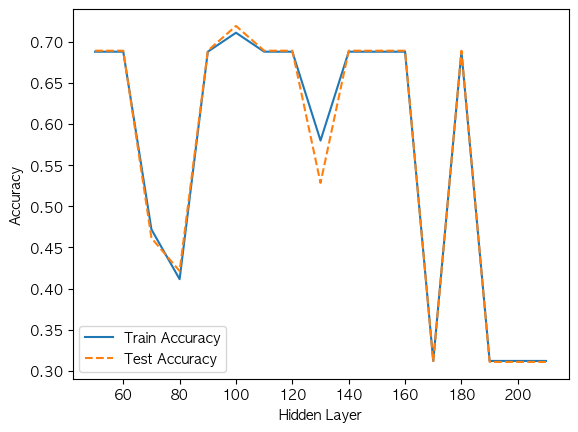

In [54]:
# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ ÌôïÏù∏
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

<!-- ÏùÄÎãâÏ∏µ Íµ¨Ï°∞Í∞Ä Î≥µÏû°Ìï†ÏàòÎ°ù trainÎ™®Îç∏Ïùò ÏÑ±Îä•ÏùÄ Ìñ•ÏÉÅÎêòÎÇò. testÎç∞Ïù¥ÌÑ∞ ÏÑ±Îä•ÏùÄ Î≥ÄÎèôÏù¥ Ïã¨Ìï®. -->

Í≥ºÏ†ÅÌï© Í≤ΩÌñ•ÏÑ±Í≥º ÏÑ±Îä•Ï∞®Î•º Í≥†Î†§Ìï¥ (100, 100)ÏúºÎ°ú ÏÑ†ÌÉù

### Activation : ÌôúÏÑ±Ìôî Ìï®Ïàò Î≥ÄÍ≤ΩÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•

In [55]:
# train Î∞è test Ï†ïÌôïÎèÑ Í≤∞Í≥º Ï†ÄÏû•Ïö©
train_accuracy = []; test_accuracy = []
# activation Î≥ÄÍ≤Ω 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes=(100,100), random_state = 1234)
#     nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state = 1234) # Î≥ÄÍ≤Ω Í∞ÄÎä•
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏îÎ°ú Ï†ÄÏû•
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1234)

In [56]:
# Activation FunctionÎ≥Ñ Ï†ïÌôïÎèÑ 
df_accuracy_function.round(3)

ActivationFunction  TrainAccuracy  TestAccuracy
0           logistic          0.688         0.689
1               tanh          0.799         0.746
2               relu          0.711         0.719

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Activation Function')

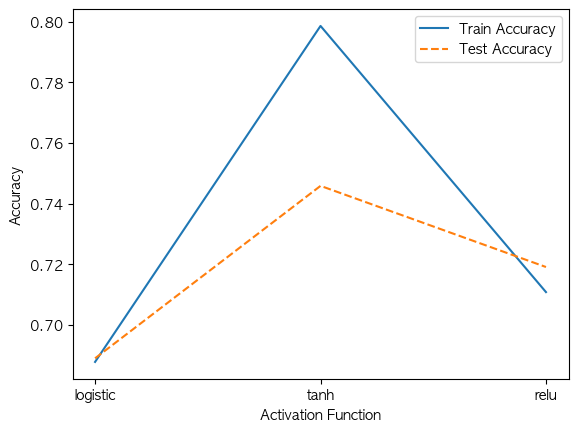

In [57]:
# Î™®Îç∏ Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ ÌôïÏù∏
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Activation Function")
plt.legend()

### Solver : Í∞ÄÏ§ëÏπò ÏµúÏ†ÅÌôî Î≥ÄÍ≤ΩÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•

In [58]:
# train Î∞è test Ï†ïÌôïÎèÑ Í≤∞Í≥º Ï†ÄÏû•Ïö©
train_accuracy = []; test_accuracy = []
# solver Î≥ÄÍ≤Ω 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="tanh", hidden_layer_sizes=(100,100), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏îÎ°ú Ï†ÄÏû•
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100),
              random_state=1234, solver='lbfgs')

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100),
              random_state=1234, solver='sgd')

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100),
              random_state=1234)

In [59]:
# SolverÎ≥Ñ Ï†ïÌôïÎèÑ ÌÖåÏù¥Î∏î
df_accuracy_solver.round(3)

Solver  TrainAccuracy  TestAccuracy
0  lbfgs          0.704         0.689
1    sgd          0.688         0.689
2   adam          0.799         0.746

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Solver')

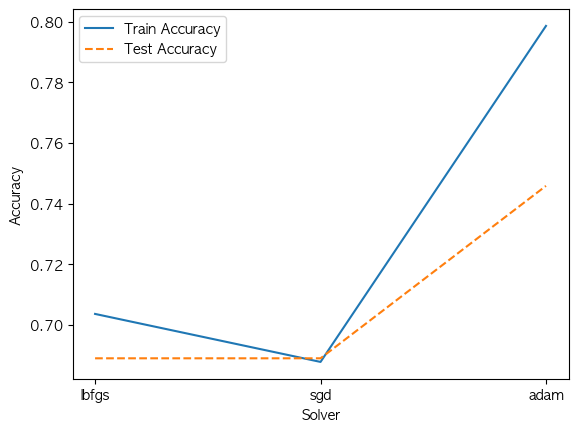

In [60]:
# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ ÌôïÏù∏
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Solver")
plt.legend()

Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏùÄ "adam"ÏÑ†ÌÉù: ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í∞ÄÏû• ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÎäî Í∞ÄÏ§ëÏπò ÏµúÏ†ÅÌôî Î∞©Î≤ï

### Mini Batch Î≥ÄÍ≤ΩÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•

In [61]:
# train Î∞è test Ï†ïÌôïÎèÑ Í≤∞Í≥º Ï†ÄÏû•Ïö©
train_accuracy = []; test_accuracy = []
# Mini Batch Î≥ÄÍ≤Ω
para_batch = [30 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "tanh", 
                       hidden_layer_sizes = (100,100), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏îÎ°ú Ï†ÄÏû•
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

[30, 60, 90, 120, 150, 180, 210, 240, 270]


MLPClassifier(activation='tanh', batch_size=30, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=60, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=90, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=150, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=180, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=210, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=240, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=270, hidden_layer_sizes=(100, 100),
              random_state=1234)

In [62]:
# Mini Batch Î≥Ñ Ï†ïÌôïÎèÑ 
df_accuracy_batch.round(3)

Mini Batch  TrainAccuracy  TestAccuracy
0          30          0.688         0.689
1          60          0.688         0.689
2          90          0.688         0.689
3         120          0.757         0.742
4         150          0.822         0.789
5         180          0.688         0.689
6         210          0.688         0.689
7         240          0.688         0.689
8         270          0.840         0.796

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Mini Batch Size')

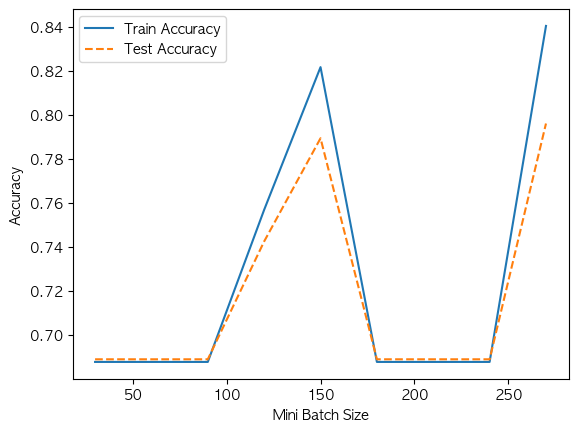

In [63]:
# Î™®Îç∏ Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ ÌôïÏù∏
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

###### trainÎ™®Îç∏ÏùÄ Í≥ºÏ†ÅÌï© + Î≥ÄÌôîÏóÜÏùå

=> ÎØ∏ÎãàÎ∞∞Ïπò 120ÏÑ†ÌÉù

### ÌïôÏäµÎ•† Î≥ÄÍ≤ΩÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä•

In [64]:
# train Î∞è test Ï†ïÌôïÎèÑ Í≤∞Í≥º Ï†ÄÏû•
train_accuracy = []; test_accuracy = []
# ÌïôÏäµÎ•† Î≥ÄÍ≤Ω
# para_lr = [0.01 * lr for lr in range(1, 10)] 
para_lr = [0.0001, 0.001, 0.005, 0.01, 0.015, 0.02] 

print(para_lr)

for v_lr in para_lr:
    nn = MLPClassifier(learning_rate_init = v_lr, solver = "adam", activation = "tanh", 
                       hidden_layer_sizes = (100,100), batch_size = 120, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏îÎ°ú Ï†ÄÏû•
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["Learning Rate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

[0.0001, 0.001, 0.005, 0.01, 0.015, 0.02]


MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.0001, random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.005, random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.01, random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.015, random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.02, random_state=1234)

In [65]:
# ÌïôÏäµÎ•†Î≥Ñ Ï†ïÌôïÎèÑ 
df_accuracy_lr.round(3)

Learning Rate  TrainAccuracy  TestAccuracy
0          0.000          0.689         0.689
1          0.001          0.757         0.742
2          0.005          0.688         0.689
3          0.010          0.688         0.689
4          0.015          0.688         0.689
5          0.020          0.688         0.689

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Learning Rate')

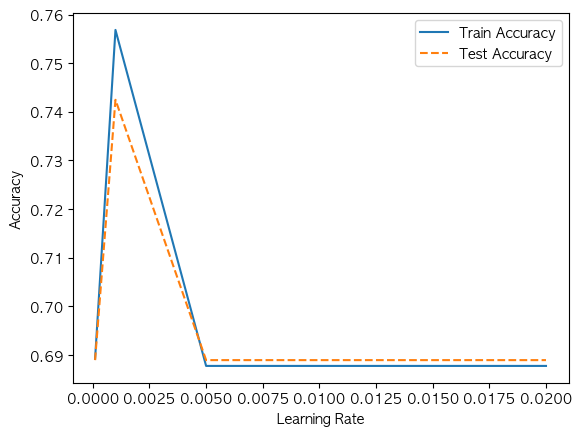

In [66]:
# Î™®Îç∏ Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ ÌôïÏù∏
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Learning Rate")
plt.legend()

#### ÌïôÏäµÎ•† Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Î™®Îç∏ Ï†ïÌôïÎèÑ ÎÇÆÏïÑÏßê -> 0.001Î°ú ÏÑ†ÌÉù  

## (3)Í≤∞Î°† ÎèÑÏ∂ú

In [67]:
# ÏµúÏ¢Ö Î™®Îç∏
nn_final = MLPClassifier(hidden_layer_sizes=(90, 90), learning_rate_init = 0.001, activation="logistic", solver="adam", batch_size = 180, random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# ÌèâÍ∞Ä
y_pred = nn_final.predict(df_test_x)

# train Î™®Îç∏ Ï†ïÌôïÎèÑ
print("Train Accucary : {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test Î™®Îç∏ Ï†ïÌôïÎèÑ
print("Test Accuracy : {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# Î™©ÌëúÎ≥ÄÏàòÏùò ÎπàÎèÑ Î∂àÍ∑†Ìòï : f1 scoreÎ°ú Î™®Îç∏ ÌèâÍ∞Ä 
print(classification_report(df_test_y, y_pred, digits=3))

MLPClassifier(activation='logistic', batch_size=180,
              hidden_layer_sizes=(90, 90), random_state=1234)

Train Accucary : 0.832
Test Accuracy : 0.806

Test Confusion Matrix: 
[[178  28]
 [ 30  63]]
              precision    recall  f1-score   support

           0      0.856     0.864     0.860       206
           1      0.692     0.677     0.685        93

    accuracy                          0.806       299
   macro avg      0.774     0.771     0.772       299
weighted avg      0.805     0.806     0.805       299



In [68]:
# Grid Search Best Model
#activation': 'relu', 'alpha': 0.001, 'early_stopping': True,
# 'hidden_layer_sizes': (64, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 300, 'solver': 'adam'
# ÏµúÏ¢Ö Î™®Îç∏
best_model = grid.best_estimator_
best_model.fit(train_x_scaled, df_train_y)

# ÌèâÍ∞Ä
y_pred = best_model.predict(test_x_scaled)

# train Î™®Îç∏ Ï†ïÌôïÎèÑ
print("Train Accucary : {:.3f}".format(best_model.score(train_x_scaled, df_train_y)))
# test Î™®Îç∏ Ï†ïÌôïÎèÑ
print("Test Accuracy : {:.3f}\n".format(best_model.score(test_x_scaled, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# Î™©ÌëúÎ≥ÄÏàòÏùò ÎπàÎèÑ Î∂àÍ∑†Ìòï : f1 scoreÎ°ú Î™®Îç∏ ÌèâÍ∞Ä 
print(classification_report(df_test_y, y_pred, digits=3))


MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64),
              learning_rate_init=0.005, max_iter=300, random_state=1234)

Train Accucary : 0.984
Test Accuracy : 0.943

Test Confusion Matrix: 
[[201   5]
 [ 12  81]]
              precision    recall  f1-score   support

           0      0.944     0.976     0.959       206
           1      0.942     0.871     0.905        93

    accuracy                          0.943       299
   macro avg      0.943     0.923     0.932       299
weighted avg      0.943     0.943     0.943       299



In [69]:
# Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
# ÏµúÏ¢Ö Î™®Îç∏
# nn_final = MLPClassifier(hidden_layer_sizes=(30, 30), activation="tanh", solver="adam", batch_size = 160, random_state = 1234)
# nn_final.fit(df_train_x, df_train_y)
# Ï†ïÌôïÎèÑ Ï†ÄÏû•
train_accuracy = []; test_accuracy = []
# auc score Ï†ÄÏû•
model_auc = []

# Precision, Recall score Ï†ÄÏû•
model_precision = []; model_recall = []
# f1 score Ï†ÄÏû•
model_f1_score = []

# Ï†ïÌôïÎèÑ
train_accuracy.append(best_model.score(train_x_scaled, df_train_y))
test_accuracy.append(best_model.score(test_x_scaled, df_test_y))

# ÏòàÏ∏°Í∞í
y_prob_1 = best_model.predict_proba(test_x_scaled)[:, 1]  # 1 Î∞úÏÉù ÌôïÎ•†
y_pred = best_model.predict(test_x_scaled)  # 1/0 ÌåêÏ†ï

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-ÌäπÏù¥ÎèÑ) = FP/(FP+TN): Í±∞Ïßì ÏñëÏÑ± ÎπÑÏú®, tpr(=ÎØºÍ∞êÎèÑ) = TP/(TP+FN): ÏßÑÏßú ÏñëÏÑ± ÎπÑÏú®(Ïû¨ÌòÑÏú®)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc Ï†ÄÏû•
model_auc.append(roc_auc)

Confusion matrix: 
[[201   5]
 [ 12  81]] 

              precision    recall  f1-score   support

           0      0.944     0.976     0.959       206
           1      0.942     0.871     0.905        93

    accuracy                          0.943       299
   macro avg      0.943     0.923     0.932       299
weighted avg      0.943     0.943     0.943       299



Text(0.5, 1.0, 'Neural Network')

Text(0, 0.5, 'ÎØºÍ∞êÎèÑ,TPR')

Text(0.5, 0, '1-ÌäπÏù¥ÎèÑ,FPR')

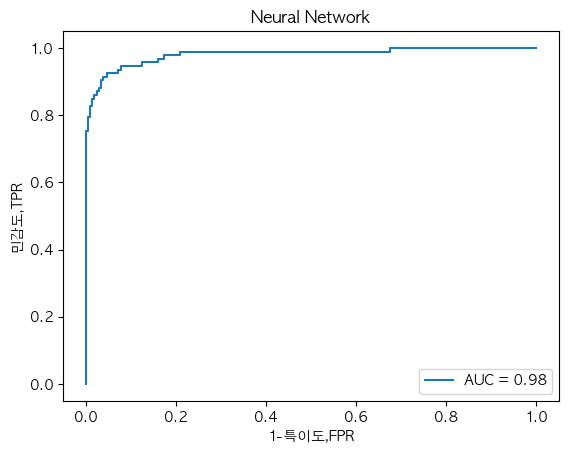

In [71]:
plt.title("Neural Network")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("ÎØºÍ∞êÎèÑ,TPR"); plt.xlabel("1-ÌäπÏù¥ÎèÑ,FPR") 
plt.show()

üìä Confusion Matrix: 
 [[201   5]
 [ 12  81]] 

üìÑ Classification Report:
               precision    recall  f1-score   support

           0      0.944     0.976     0.959       206
           1      0.942     0.871     0.905        93

    accuracy                          0.943       299
   macro avg      0.943     0.923     0.932       299
weighted avg      0.943     0.943     0.943       299



<Figure size 700x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, '1 - ÌäπÏù¥ÎèÑ (False Positive Rate)')

Text(0, 0.5, 'ÎØºÍ∞êÎèÑ (True Positive Rate)')

Text(0.5, 1.0, 'üìà ROC Curve - Neural Network')

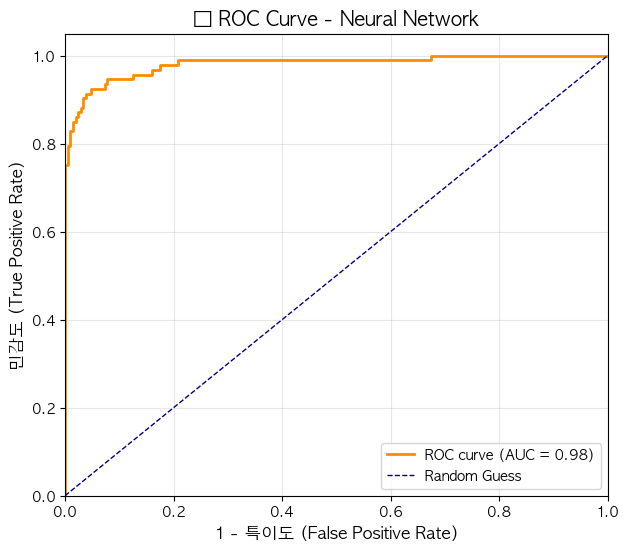

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# ÏòàÏ∏° ÌôïÎ•† & Í≤∞Í≥º
y_prob_1 = best_model.predict_proba(test_x_scaled)[:, 1]  # ÌÅ¥ÎûòÏä§ 1 ÌôïÎ•†
y_pred = best_model.predict(test_x_scaled)  # ÏµúÏ¢Ö ÏòàÏ∏° Í≤∞Í≥º

# ÌòºÎèô ÌñâÎ†¨ & classification report
print("üìä Confusion Matrix: \n", confusion_matrix(df_test_y, y_pred), "\n")
print("üìÑ Classification Report:\n", classification_report(df_test_y, y_pred, digits=3))

# ROC Curve Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - ÌäπÏù¥ÎèÑ (False Positive Rate)', fontsize=12)
plt.ylabel('ÎØºÍ∞êÎèÑ (True Positive Rate)', fontsize=12)
plt.title('üìà ROC Curve - Neural Network', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
